In [32]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [33]:
import tensorflow as tf
from tensorflow import keras

In [6]:
train_dir=r'C:\Users\vinee\train'
validation_dir=r'C:\Users\vinee\validation'
test_dir=r'C:\Users\vinee\test'

### Data Preprocessing

1.Read the picture files

2.Decode the JPEG content to RGB grids of pixels

3.Convert these into floating point tensors

4.Rescale the pixel values (between 1 to 255) to [0,1] INTERVAL

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [21]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)      

In [24]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [25]:
history=model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=20,
                           validation_data=validation_generator,
                           validation_steps=50)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 103s 1s/step - loss: 0.6892 - acc: 0.5330 - val_loss: 0.7313 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 90s 903ms/step - loss: 0.6635 - acc: 0.6000 - val_loss: 0.6465 - val_acc: 0.6230
Epoch 3/20
100/100 [==============================] - 88s 878ms/step - loss: 0.6232 - acc: 0.6610 - val_loss: 0.6145 - val_acc: 0.6550
Epoch 4/20
100/100 [==============================] - 90s 899ms/step - loss: 0.5828 - acc: 0.6980 - val_loss: 0.6200 - val_acc: 0.6430
Epoch 5/20
100/100 [==============================] - 88s 883ms/step - loss: 0.5458 - acc: 0.7160 - val_loss: 0.5931 - val_acc: 0.6760
Epoch 6/20
100/100 [==============================] - 90s 899ms/step - loss: 0.5143 - acc: 0.7380 - val_loss: 0.6549 - val_acc: 0.6440
Epoch 7/20
100/100 [==============================] - 88s 885ms/step - loss: 0.5010 - acc: 0.7560 

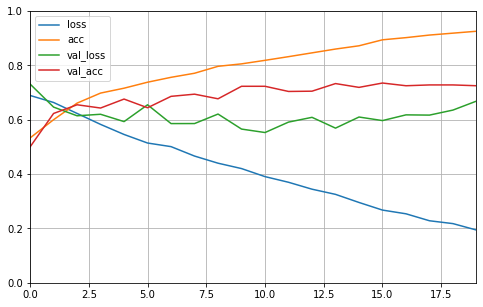

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.save("model.h5")

In [28]:
from tensorflow.keras import backend as K
K.clear_session()
del model

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=32,
                    class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=32,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
history=model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=50,
                           validation_data=validation_generator,
                           validation_steps=50)

Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 150s 2s/step - loss: 0.6932 - acc: 0.5035 - val_loss: 0.6841 - val_acc: 0.5508
Epoch 2/50
100/100 [==============================] - 143s 1s/step - loss: 0.6818 - acc: 0.5506 - val_loss: 0.6653 - val_acc: 0.6098
Epoch 3/50
100/100 [==============================] - 141s 1s/step - loss: 0.6681 - acc: 0.5900 - val_loss: 0.6491 - val_acc: 0.6161
Epoch 4/50
100/100 [==============================] - 147s 1s/step - loss: 0.6570 - acc: 0.6065 - val_loss: 0.6278 - val_acc: 0.6301
Epoch 5/50
100/100 [==============================] - 143s 1s/step - loss: 0.6347 - acc: 0.6408 - val_loss: 0.6324 - val_acc: 0.6142
Epoch 6/50
100/100 [==============================] - 125s 1s/step - loss: 0.6283 - acc: 0.6452 - val_loss: 0.5811 - val_acc: 0.6929
Epoch 7/50
100/100 [==============================] - 137s 1s/step - loss: 0.6047 - acc: 0.6768 - val_loss: 

In [10]:
model.save("modelcats.h5")

## VGG16

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

58892288/58889256 [==============================] - 65s 1us/step


In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [17]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("CNN_project_Model_vgg16.h5",save_best_only=True)

In [19]:
history=model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=2,
                           validation_data=validation_generator,
                           validation_steps=50,
                           callbacks=[checkpoint_cb])

Epoch 1/2
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 1102s 11s/step - loss: 0.4778 - acc: 0.7685 - val_loss: 0.2104 - val_acc: 0.9220
Epoch 2/2
100/100 [==============================] - 1015s 10s/step - loss: 0.2866 - acc: 0.8740 - val_loss: 0.1408 - val_acc: 0.9400


In [20]:
hist_df=pd.DataFrame(history.history)

In [21]:
hist_csv_file='history.csv'
with open(hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [23]:
test_generator=test_datagen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=20,
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
model.evaluate_generator(test_generator,steps=50)

[0.14396967550739645, 0.937]

In [3]:
# make a prediction for a new image.
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

categories=["cat","dog"]

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(150, 150))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 150, 150, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    #Sum up the intensities of the training set for each color channel separately and divide by the total number of pixels. You can do that manually in python with x_train.mean(axis=(0,1,2)).
    #Why: Once we know the mean, we can subtract it from all pixel values so the intensities are centered at 0. this helps to increase training speed and accuracy.
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('dogtest.jpg')
    # load model
    model = load_model('CNN_project_Model_vgg16.h5')
    # predict the class
    result = model.predict(img)
    print(categories[int(result[0])])

run_example()

dog
